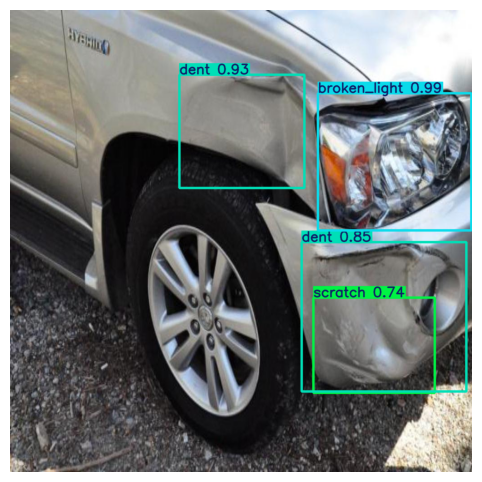

In [3]:
from detection.detector import Detector
import cv2
import matplotlib.pyplot as plt

detector = Detector("/Users/pacuk/Downloads/yolo-detect-new.pt")

img = cv2.imread("/Users/pacuk/Documents/cv-project/car-damage-assessment/data/testing/iphne/8.jpg")
results = detector.predict(img, iou=0.1)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(results[0]["plot_img"], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

In [4]:
import cv2
import matplotlib.pyplot as plt

from detection.detector import Detector

SEED = 42

class DamageInference:
    def __init__(self, model_path, file_path, conf_thresh=0.5):
        self.detector = Detector(model_path,conf_thresh)
        self.file_path = file_path
        self.image_exts = ['.jpg', '.jpeg', '.webp', '.png']
        self.video_exts = ['.mp4', '.mov', '.avi', '.mkv']

    def run(self):
        ext = os.path.splitext(self.file_path)[-1].lower()

        if ext in self.image_exts:
            img = cv2.imread(self.file_path)
            results = self.detector.predict(img,iou=0.3)
            annotated = results[0]["plot_img"]

            plt.figure(figsize=(10, 6))
            plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title("YOLO Detection")
            plt.show()

        elif ext in self.video_exts:
            results = self.detector.model.predict(self.file_path, stream=True, verbose=False)
            out = None

            for result in results:
                annotated_frame = result.plot()

                if out is None:
                    frame_height, frame_width = annotated_frame.shape[:2]
                    out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"XVID"), 30, (frame_width, frame_height))

                if annotated_frame.shape[2] == 4:
                    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGRA2BGR)

                out.write(annotated_frame)
                cv2.imshow("YOLO Detection (Video)", annotated_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            if out:
                out.release()
            cv2.destroyAllWindows()

        else:
            raise ValueError(f"Unsupported file format: {ext}")

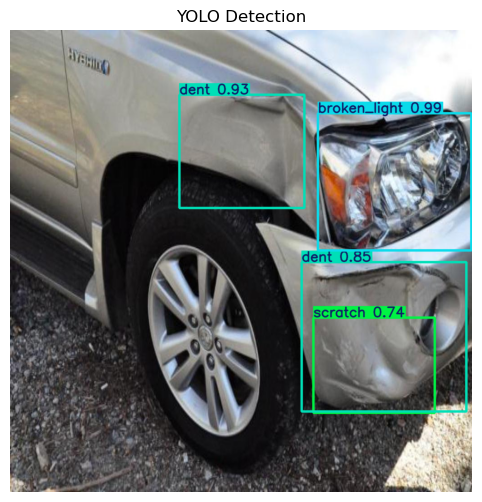

In [5]:
inference = DamageInference("/Users/pacuk/Downloads/yolo-detect-new.pt", "/Users/pacuk/Documents/cv-project/car-damage-assessment/data/testing/iphne/8.jpg", conf_thresh=0.7)
inference.run()